

<span style="font-size:30px">Tarea 4: Generar el modelo </span>

# Modelamiento

###MODELAMIENTO

### Importar datos


In [14]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

data = pd.read_csv('datos_procesados.csv', index_col=0)

### Explorar datos

In [15]:
data.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,impact,urgency,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,2 - Medium,3 - Low,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,2 - Medium,2 - Medium,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,2 - Medium,2 - Medium,3 - Moderate,Group 70,Resolver 17,False,0.583333


In [16]:
#revisar que no hay nas
data.isna().sum()


caller_id                  0
opened_by                  0
contact_type               0
location                   0
category                   0
subcategory                0
u_symptom                  0
impact                     0
urgency                    0
priority                   0
assignment_group           0
assigned_to                0
u_priority_confirmation    0
duracion_horas             0
dtype: int64

In [17]:
#revisar que tipo de datos hay en cada columna 
data.dtypes

caller_id                   object
opened_by                   object
contact_type                object
location                    object
category                    object
subcategory                 object
u_symptom                   object
impact                      object
urgency                     object
priority                    object
assignment_group            object
assigned_to                 object
u_priority_confirmation       bool
duracion_horas             float64
dtype: object


Tecnicamente solo me importa Priority porque segun el diccionario "priority: calculada por el sistema en base al 'impacto' y la 'urgencia'" 
Entonces la columna priority ya me tiene en cuenta el impacto y urgencia. Por eso borrare impacto y urgencia y me concentrare solo el prioridad


In [18]:
#sacar lsa columnas urgencia e impacto del data frame
data = data.drop('urgency', axis=1)
data = data.drop('impact', axis=1)
data.head()


,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas
number,,,,,,,,,,,,
INC0000077,Caller 3304,Opened by 180,Phone,Location 108,Category 32,Subcategory 9,Symptom 470,3 - Moderate,Group 70,No asignado,False,0.616667
INC0000088,Caller 388,Opened by 180,Phone,Location 93,Category 42,Subcategory 224,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.283333
INC0000101,Caller 1892,Opened by 180,Phone,Location 143,Category 55,Subcategory 170,Symptom 273,4 - Low,Group 65,Resolver 180,False,1.916667
INC0000192,Caller 1590,Opened by 131,Phone,Location 143,Category 45,Subcategory 200,Symptom 4,3 - Moderate,Group 70,No asignado,False,0.066667
INC0000167,Caller 649,Opened by 24,Phone,Location 108,Category 20,Subcategory 125,No reportado,3 - Moderate,Group 70,Resolver 17,False,0.583333


Ver cuantas categorias tiene cada variable

In [19]:
print("caller id:", len(data['caller_id'].unique()))
print("opened_by:", len(data['opened_by'].unique()))
print("contact_type:", len(data['contact_type'].unique()))
print("location:", len(data['location'].unique()))
print("category:", len(data['category'].unique()))
print("subcategory:", len(data['subcategory'].unique()))
print("u_symptom:", len(data['u_symptom'].unique()))
print("priority:", len(data['priority'].unique()))
print("assignment_group:", len(data['assignment_group'].unique()))
print("assigned_to:", len(data['assigned_to'].unique()))
print("u_priority_confirmation:", len(data['u_priority_confirmation'].unique()))

caller id: 5004
opened_by: 200
contact_type: 4
location: 213
category: 54
subcategory: 237
u_symptom: 420
priority: 4
assignment_group: 69
assigned_to: 211
u_priority_confirmation: 2


### Dividir datos entre train y test

In [20]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split( data, test_size=0.2, random_state=2)

In [21]:
#revisar dimensiones sean 80% train 20% test
print(train_data.shape)
print(test_data.shape)

(17197, 12)
(4300, 12)


usaremos train_data para crear el modelo y test_data para probarlo

<span style="font-size:22px">HACER CLUSTERING</span>

Como el modelo de regresion solo puede recibir datos numericos (ya sean variables dummies), hay que tratar los datos categoricos de alguna manera. Para esto se va a emplear el metodo de clustering para las variables (columnas) que tiene mas de 6 categorias. 

** Las variables con menos de 6 categorias se trataran mas adelante como variables dummies. 

El metodo de clustering que se usará es el de K-means

Solo se hara el clustering con el test data para evitar el leakage de info entre train y test data

In [22]:
#Crear funcion para determinar numero de clusters K

def k_adecuado( nombre_col:str, dataset:pd.DataFrame ):
    #features es solo un data set que en cada fila tiene las estadisticas de duracion horas
    features = (dataset.groupby(nombre_col)["duracion_horas"]
            .agg(mean="mean", median="median", std="std",
                 p25=lambda x: x.quantile(0.25),
                 p75=lambda x: x.quantile(0.75),
                 p90=lambda x: x.quantile(0.90))
            .fillna(0))

    print(features)


    # --- 2) Estandarizar rápido 
    X = (features - features.mean()) / features.std().replace(0, 1.0) #replace hace que si el std dev de alguna location es 0 porque solo hay una obs, no divida la normalizacion por 0
    X = X.values  # matriz para sklearn

    # --- 3) Barrido de k: inercia (codo) + silhouette
    Ks = range(2, 30)  # prueba k = 2..30
    inertias, sils = [], []

    for k in Ks:
        km = KMeans(n_clusters=k, random_state=42, n_init=10)
        labels = km.fit_predict(X)
        inertias.append(km.inertia_)
        sils.append(silhouette_score(X, labels))  # ∈ [-1, 1]; mayor es mejor

    # --- 4) Graficar ambas curvas
    fig, ax = plt.subplots()
    ax.plot(Ks, inertias, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Inercia (codo)")
    ax.set_title("Método del codo")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()


    #pedir input del star y end de la grafica 

    # --- Pedir input para el rango a graficar
    start = int(input("Ingrese el valor de k inicial para graficar: "))
    end = int(input("Ingrese el valor de k final para graficar: "))


    # Filtrar el rango
    Ks_range = [k for k in Ks if start <= k <= end]
    sils_range = [sils[i] for i, k in enumerate(Ks) if start <= k <= end]

    # --- Graficar Silhouette vs k en el rango seleccionado
    fig, ax = plt.subplots()
    ax.plot(Ks_range, sils_range, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    ax.set_xticks(Ks_range)
    plt.show()

    '''
    fig, ax = plt.subplots()
    ax.plot(Ks, sils, marker="o")
    ax.set_xlabel("Número de clusters (k)")
    ax.set_ylabel("Silhouette promedio")
    ax.set_title("Silhouette vs k")
    # Añadir etiquetas a cada punto
    ax.set_xticks(Ks)
    plt.show()
    '''
    # --- 5) k sugerido por silhouette
    best_k = Ks[int(np.argmax(sils))]
    print("Mejor k por silhouette:", best_k, " | silhouette:", max(sils))

    k_escogido= int(input("Ingrese el valor de k escogido: "))
    return (k_escogido, features)

#Crear funcion para asignar el cluster adecuado a cada categoria

def clusters(k, features: pd.DataFrame):
    # Estandarizar igual que en k_adecuado
    features_scaled = (features - features.mean()) / features.std().replace(0, 1.0)

    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(features_scaled.values)

    df_clusters = features.copy()
    df_clusters["cluster"] = labels

    return df_clusters, kmeans


Invocar el número de clusters por variable y guardar el df que devuelve en respectiva variable

In [23]:
data.columns

Index(['caller_id', 'opened_by', 'contact_type', 'location', 'category',
       'subcategory', 'u_symptom', 'priority', 'assignment_group',
       'assigned_to', 'u_priority_confirmation', 'duracion_horas'],
      dtype='object')

                   mean      median         std        p25         p75  \
caller_id                                                                
Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
...                 ...         ...         ...        ...         ...   
Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

                    p90  
caller_id  

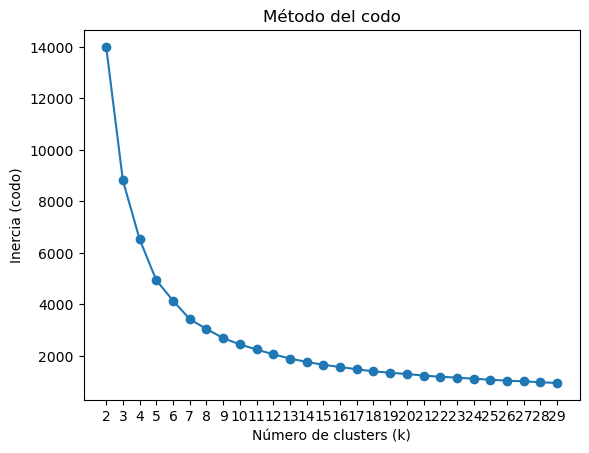

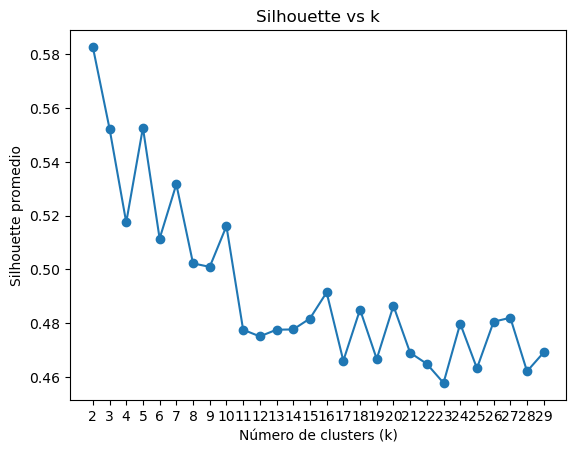

Mejor k por silhouette: 2  | silhouette: 0.5826709730972621
                      mean      median         std        p25         p75  \
opened_by                                                                   
Opened by  10   155.905556   55.783333  210.227571   4.808333  272.475000   
Opened by  101   64.475000   64.475000   51.559869  46.245833   82.704167   
Opened by  104  193.383333  193.383333  271.364012  97.441667  289.325000   
Opened by  108   93.737570   24.283333  136.654719   0.783333  141.566667   
Opened by  109   76.758696    2.050000  146.264291   0.516667   82.225000   
...                    ...         ...         ...        ...         ...   
Opened by  88    41.916667   41.916667    0.000000  41.916667   41.916667   
Opened by  9    218.184409  191.933333  171.454476  60.808333  324.516667   
Opened by  90    28.333333   28.333333    0.000000  28.333333   28.333333   
Opened by  91    21.705556    3.333333   34.600282   1.750000   32.475000   
Opened by  94   

c:\Users\cardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\cardo\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

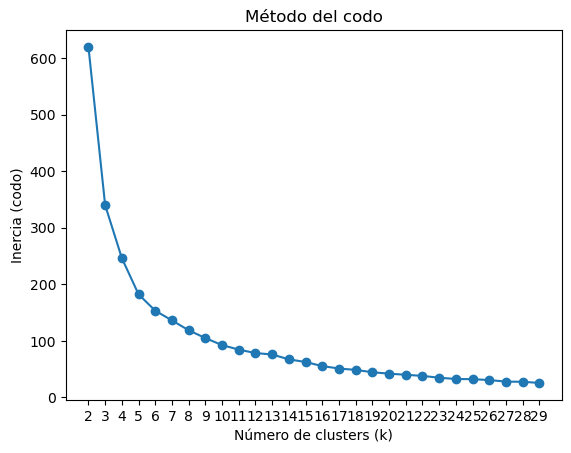

ValueError: invalid literal for int() with base 10: ''

In [24]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt


cols=['caller_id', 'opened_by', 'location', 'category', 'subcategory', 'u_symptom', 'assignment_group', 'assigned_to']

features_dict={}
for col in cols:
    features_dict[f"features_{col}"] = k_adecuado(col, train_data)

In [ ]:
#Ver lo que retorna K_adecuado
#un diccionario con con llave llamada features_COLUMNA 
# valores es una tupla de (K, features)
features_dict

{'features_caller_id': (5,
                     mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333 

#### Con los K ya definidos, clusterizar los datos y guardar esos dataframes de respuestas en un diccionario 

In [ ]:
cluster_dict={}
for col in cols:
    k, feature = features_dict[f"features_{col}"]
    cluster_dict[col]= clusters(k,feature)

In [ ]:
cluster_dict


{'caller_id': (                   mean      median         std        p25         p75  \
  caller_id                                                                
  Caller 10    108.700000  108.700000   50.958829  90.683333  126.716667   
  Caller 1000    0.066667    0.066667    0.000000   0.066667    0.066667   
  Caller 1001  168.740000   29.533333  221.406288   8.433333  321.450000   
  Caller 1002    1.158333    1.158333    1.567420   0.604167    1.712500   
  Caller 1004    0.150000    0.150000    0.000000   0.150000    0.150000   
  ...                 ...         ...         ...        ...         ...   
  Caller 995    66.311111   18.025000  123.160226  17.866667   18.870833   
  Caller 996    38.711111   47.450000   35.051773  23.783333   58.008333   
  Caller 997    71.691667   71.533333   71.240886  15.854167  127.370833   
  Caller 998    57.920000    1.066667  104.396780   0.533333   46.533333   
  Caller 999    77.670833    0.600000  154.486567   0.208333   78.062500   

In [ ]:
x,y= cluster_dict["caller_id"]

print(y)


KMeans(n_clusters=5, n_init=10, random_state=42)


### Consolidar info de clusters y denifir a que cluster pertenece cada etiqueta 

In [ ]:
# cluster_dict[col] = (df_clusters, kmeans)  

cluster_maps = {}  # {col: {categoria: id_cluster}}
for col in cols:
    df_clusters, _ = cluster_dict[col]
    # df_clusters tiene las estadísticas + columna 'cluster'; su índice son las categorías
    cluster_maps[col] = df_clusters['cluster'].to_dict()
cluster_maps

{'caller_id': {'Caller 10': 1,
  'Caller 1000': 2,
  'Caller 1001': 4,
  'Caller 1002': 2,
  'Caller 1004': 2,
  'Caller 1005': 2,
  'Caller 1006': 4,
  'Caller 1007': 4,
  'Caller 1009': 4,
  'Caller 101': 2,
  'Caller 1010': 2,
  'Caller 1011': 2,
  'Caller 1012': 2,
  'Caller 1013': 2,
  'Caller 1016': 2,
  'Caller 1017': 1,
  'Caller 1018': 2,
  'Caller 1019': 2,
  'Caller 102': 2,
  'Caller 1020': 0,
  'Caller 1021': 1,
  'Caller 1022': 2,
  'Caller 1024': 2,
  'Caller 1025': 0,
  'Caller 1026': 3,
  'Caller 1028': 3,
  'Caller 1029': 1,
  'Caller 103': 4,
  'Caller 1034': 2,
  'Caller 1035': 2,
  'Caller 1036': 2,
  'Caller 1037': 2,
  'Caller 1038': 2,
  'Caller 1039': 2,
  'Caller 104': 4,
  'Caller 1040': 2,
  'Caller 1041': 2,
  'Caller 1043': 3,
  'Caller 1044': 3,
  'Caller 1045': 0,
  'Caller 1049': 0,
  'Caller 1050': 2,
  'Caller 1054': 0,
  'Caller 1055': 2,
  'Caller 1056': 2,
  'Caller 1057': 0,
  'Caller 1058': 2,
  'Caller 1059': 2,
  'Caller 106': 2,
  'Caller 1060

### Crear columnas  por cluster en train y test + manejar “desconocidos”

In [ ]:
# Crear copias para mejor organizacion
train_enc = train_data.copy()
test_enc  = test_data.copy()

high_card_cols = cols[:]  # las que clusterizaste
cluster_cols = []

for col in high_card_cols:
    newc = f"{col}_cluster"
    cluster_cols.append(newc)

    # Train: mapeo directo
    train_enc[newc] = train_enc[col].map(cluster_maps[col]).astype('Int64')

    # Test: mapeo; lo no visto en train queda como -1
    test_enc[newc]  = test_enc[col].map(cluster_maps[col])
    test_enc[newc]  = test_enc[newc].fillna(-1).astype(int)

# (Opcional pero recomendado) pasar estos *_cluster a string para tratarlos como categóricos en dummies
for c in cluster_cols:
    train_enc[c] = train_enc[c].astype(str)
    test_enc[c]  = test_enc[c].astype(str)

train_enc.head()

,caller_id,opened_by,contact_type,location,category,subcategory,u_symptom,priority,assignment_group,assigned_to,u_priority_confirmation,duracion_horas,caller_id_cluster,opened_by_cluster,location_cluster,category_cluster,subcategory_cluster,u_symptom_cluster,assignment_group_cluster,assigned_to_cluster
number,,,,,,,,,,,,,,,,,,,,
INC0024696,Caller 3492,Opened by 501,Phone,Location 93,Category 46,Subcategory 223,No reportado,3 - Moderate,Group 39,Resolver 183,True,7.233333,4,4,1,4,0,1,1,0
INC0012272,Caller 1904,Opened by 180,Phone,Location 188,Category 51,Subcategory 174,Symptom 491,3 - Moderate,Group 64,Resolver 94,False,0.533333,2,0,0,1,1,1,1,0
INC0032093,Caller 583,Opened by 17,Phone,Location 45,Category 46,Subcategory 251,Symptom 217,3 - Moderate,Group 22,Resolver 52,False,3.000000,2,4,1,4,1,1,2,2
INC0024729,Caller 3233,Opened by 385,Phone,Location 51,Category 26,Subcategory 275,Symptom 474,3 - Moderate,Group 70,No asignado,False,54.416667,0,0,1,4,1,0,1,2
INC0024097,Caller 116,Opened by 12,Phone,Location 204,Category 19,Subcategory 174,Symptom 491,3 - Moderate,Group 56,Resolver 167,True,4.200000,0,4,1,4,1,1,1,2


### Volver todo variables dummies 

In [ ]:
# 3.1 Identificar categóricas “baja cardinalidad” (excluyendo las de high_card_cols ya tratadas)
cat_cols_all = train_enc.select_dtypes(include='object').columns.tolist()
low_card_cols = ["contact_type","priority", "u_priority_confirmation"]

# 3.2 Columnas que vamos a transformar con dummies:
dummies_cols = low_card_cols + cluster_cols

# Matrices categóricas -> dummies en train y test data 
Xtr_cat = pd.get_dummies(train_enc[low_card_cols + cluster_cols], drop_first=True)
Xte_cat = pd.get_dummies(test_enc[low_card_cols + cluster_cols],  drop_first=True)

# Alinear columnas entre train/test. (esto hace que si hay una categoria en test que no aparecio en train, el modelo pueda lidear con ella)
    #union garantiza el mismo espacio de variables
    #cols_union = unión de todas las columnas dummies vistas en train y test.
    #reindex obliga a que ambos dataframes tengan esas columnas en el mismo orden.

cols_union = Xtr_cat.columns.union(Xte_cat.columns)
X_train = Xtr_cat.reindex(columns=cols_union, fill_value=0)
X_test  = Xte_cat.reindex(columns=cols_union, fill_value=0)

# Crear la variable Y que quiero predecir en train y test
y_train = train_enc['duracion_horas'].astype(float)
y_test  = test_enc['duracion_horas'].astype(float)
print("X_train:", X_train.shape, " X_test:", X_test.shape) #revisar que tenga el mismo numero de columnas



X_train: (17197, 43)  X_test: (4300, 43)


### Crear el modelo de regresion

In [ ]:
from sklearn.linear_model import LinearRegression

#crear el modelod e regresion llamado linreg
linreg = LinearRegression()
linreg.fit(X_train, y_train) 
    #hace el cálculo para encontrar los coeficientes𝛽  que minimizan el error cuadrático medio (MSE) en los datos de entrenamiento
    #Guarda esos coeficientes en el objeto linreg → accesibles en linreg.coef_ y linreg.intercept_.



,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
#ver el valor de los coeficientes 

# Series con índice = nombres de las variables
coefs = pd.Series(linreg.coef_, index=X_train.columns)

# Mostrar ordenado por magnitud absoluta
coefs_sorted = coefs.sort_values(key=np.abs, ascending=False)

print("Intercepto:", linreg.intercept_)
print("\nTop 20 coeficientes (por magnitud):")
print(coefs_sorted.head(20))


Intercepto: 9.719490692434405

Top 20 coeficientes (por magnitud):
caller_id_cluster_3           262.325903
assigned_to_cluster_3         228.480785
u_symptom_cluster_2           196.757181
assigned_to_cluster_5         170.990658
subcategory_cluster_4         165.933462
opened_by_cluster_3           125.722862
category_cluster_3            118.186904
assigned_to_cluster_4          87.424847
location_cluster_2             83.339021
caller_id_cluster_4            78.205918
assigned_to_cluster_1          76.389399
assignment_group_cluster_1    -67.234448
caller_id_cluster_1            63.218389
category_cluster_2             56.475324
subcategory_cluster_2          55.888712
caller_id_cluster_2           -51.640740
opened_by_cluster_2            44.123888
subcategory_cluster_3          43.840206
opened_by_cluster_1            40.801721
priority_4 - Low               39.188342
dtype: float64


In [ ]:
#Predecir la duracion tanto con los datos de train como con los de test
y_pred_tr = linreg.predict(X_train)
y_pred_te = linreg.predict(X_test)

print("predicciones de train", y_pred_tr )
print("predicciones de test", y_pred_te )

predicciones de train [113.33444875  -8.56458379  64.09861951 ...  53.09209662 115.73935968
 193.02762888]
predicciones de test [115.73935968  34.21088117  76.45129181 ...  20.54205564  49.50126675
  87.85229706]


In [ ]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# === 5) Métricas simples ===
def resumen_metricas(y_true, y_pred, nombre=""):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae  = mean_absolute_error(y_true, y_pred)
    r2   = r2_score(y_true, y_pred)
    print(f"[{nombre}] RMSE={rmse:.3f} | MAE={mae:.3f} | R2={r2:.3f}")

resumen_metricas(y_train, y_pred_tr, "TRAIN LinearRegression")
resumen_metricas(y_test,  y_pred_te, "TEST  LinearRegression")

[TRAIN LinearRegression] RMSE=108.157 | MAE=72.995 | R2=0.392
[TEST  LinearRegression] RMSE=128.733 | MAE=87.801 | R2=0.074


RMSE / MAE: error promedio de predicción en las mismas unidades que tu target (duracion_horas).
→ Tus predicciones se equivocan en promedio unas 70–90 horas.

R²: proporción de la variabilidad explicada.

0.39 en train significa que el modelo explica aprox. 39% de la variación.

0.039 en test significa que en datos nuevos casi no explica nada (muy bajo).

Existen predicciones negativas, otro modelo donde se transforme el valor de duracion el log-> obliga al modelo tener valores >0. 

### Prediccion interactiva


In [29]:
# ======================
# PREDICCIÓN INTERACTIVA
# ======================

import pandas as pd
import numpy as np

# ---- CONFIGURACIÓN ----
# Cambia a True si entrenaste con y = log1p(duracion_horas)
USE_LOG_TARGET = False

# Si tu modelo entrenado no se llama 'linreg', pon aquí la variable correcta
MODEL = linreg

# (Opcional) Cortar predicciones negativas a 0 en caso de usar target sin log
CLIP_NON_NEGATIVE = True

# ---- FUNCIONES AUXILIARES ----
def transformar_nuevo(df_new: pd.DataFrame,cluster_maps: dict,high_card_cols: list,low_card_cols: list,cols_union: pd.Index) -> pd.DataFrame:
    """Retorna una matriz con las variables ya codificadas en dummies y listas coo insumo """

    Z = df_new.copy()

    # 1) Asignar clusters a columnas de alta cardinalidad. Si hay una entrada no reconocida, le pone el cluster -1. es como categoria de other
    for col in high_card_cols:
        newc = f"{col}_cluster"
        # categorías no vistas -> -1
        Z[newc] = Z[col].map(cluster_maps[col]).fillna(-1).astype(int).astype(str)

    # 2) One-hot de (baja cardinalidad + *_cluster) con drop_first=True para evitar multicolinealidad
    cluster_cols = [f"{c}_cluster" for c in high_card_cols]
    Z_cat = pd.get_dummies(Z[low_card_cols + cluster_cols], drop_first=True)

    # 3) Alinear columnas a las del entrenamiento
    Z_cat = Z_cat.reindex(columns=cols_union, fill_value=0)

    return Z_cat


def pedir_valores_usuario(campos: list) -> pd.DataFrame:
    """Pide por consola el valor de cada campo categórico y retorna un DataFrame de 1 fila. Esto es lo que se pide en transformar nuevo"""
    print("\nIngresa el valor para cada campo (tal como aparece en tus datos).")
    registro = {}
    for c in campos:
        v = input(f"  {c}: ").strip()
        registro[c] = v
    return pd.DataFrame([registro])


# ---- LISTA DE CAMPOS QUE PEDIRÁS AL USUARIO ----
# Usaremos exactamente las mismas columnas categóricas originales:
# alta cardinalidad = cols (ya clusterizadas)
# baja cardinalidad = low_card_cols (que convertiste a dummies)

#Definir los campos que el usuario tiene que ingresar para pdoer predecir
campos_entrada = cols + low_card_cols  # el orden no importa


# ---- LOOP DE PREDICCIÓN INTERACTIVA ----
while True:
    print("\n=== Nuevo ticket ===")
    df_usuario = pedir_valores_usuario(campos_entrada) 

    # Transformar igual que en entrenamiento
    X_nuevo = transformar_nuevo( df_new=df_usuario,cluster_maps=cluster_maps,high_card_cols=cols,low_card_cols=low_card_cols,cols_union=cols_union)

    # Predecir
    y_hat = MODEL.predict(X_nuevo)
    
    # Si entrenaste con log1p, vuelve a escala original
    if USE_LOG_TARGET:
        y_hat = np.expm1(y_hat)

    # (opcional) evitar negativos en la salida si trabajas en escala original
    if CLIP_NON_NEGATIVE and not USE_LOG_TARGET:
        y_hat = np.maximum(y_hat, 0)

    print(f"\nDuración predicha del ticket: {float(y_hat[0]):.2f} horas")

    cont = input("\n¿Deseas predecir otro ticket? (s/n): ").strip().lower()
    if cont != "s":
        print("¡Listo! Fin de la predicción interactiva.")
        break


NameError: name 'linreg' is not defined

In [28]:
# === EXPORTAR ARTEFACTOS PARA EL DASH ===
from joblib import dump
from pathlib import Path
import json, numpy as np, pandas as pd

ART = Path("models"); ART.mkdir(exist_ok=True)

# 1) Modelo
dump(linreg, ART / "linreg.joblib")

# 2) Mapeos / listas
with open(ART/"cluster_maps.json","w",encoding="utf-8") as f:
    cmaps = {col:{str(k): int(v) for k,v in mp.items()} for col, mp in cluster_maps.items()}
    json.dump(cmaps, f, ensure_ascii=False)

json.dump(list(cols),          open(ART/"high_card_cols.json","w"))
json.dump(list(low_card_cols), open(ART/"low_card_cols.json","w"))
json.dump(list(cols_union),    open(ART/"cols_union.json","w"))

# 3) Dominios para dropdowns (valores vistos en entrenamiento)
campos_entrada = list(cols) + list(low_card_cols)
value_domains = {}
for c in campos_entrada:
    base = df_train  # usa el DF donde tengas esas columnas
    vals = base[c].dropna().astype(str).unique().tolist()
    value_domains[c] = sorted(vals)[:200]
json.dump(value_domains, open(ART/"value_domains.json","w"), ensure_ascii=False)

# 4) Config
json.dump({
    "USE_LOG_TARGET": bool(USE_LOG_TARGET),
    "CLIP_NON_NEGATIVE": bool(CLIP_NON_NEGATIVE),
    "SLA_TARGET_HOURS": 8.0  # cambia si tu SLA es otro
}, open(ART/"predict_config.json","w"))

print("✅ Artefactos listos en ./models/")


NameError: name 'linreg' is not defined